# Домашнее задание к лекции 2.6 «Инструменты для визуализации и изучения данных»

**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [75]:
#увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <div style='text-align: center'>Буду анализировать покемонов (ну не коронавирус же)<br>задача узнать, кто же самый крутой!</div>

In [4]:
#создаем дата фрейм
df = pd.read_csv('./pokemon/pokemon.csv').set_index('name')
df.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


## <div style='text-align: center'>Оставим только физические параметы, такие как атака, защита, скорость и т.д.</div>

In [39]:
df = df[['hp','attack', 'defense',  'speed', 'sp_attack', 'sp_defense']]

In [41]:
df.head(3)

,hp,attack,defense,speed,sp_attack,sp_defense
name,,,,,,
Bulbasaur,45,49,49,45,65,65
Ivysaur,60,62,63,60,80,80
Venusaur,80,100,123,80,122,120


## <div style='text-align: center'>Создадим колонку total_point в которой будет суммарное знчение всех показателей</div>

In [59]:
cols = ['hp','attack', 'defense',  'speed', 'sp_attack', 'sp_defense']
df = df.eval("total_point = {}".format('+'.join(cols))) # так вот сложение значений по столбцам выглядит

In [60]:
df.head(5)

,hp,attack,defense,speed,sp_attack,sp_defense,total_point
name,,,,,,,
Mewtwo,106,150,70,140,194,120,780
Rayquaza,105,180,100,115,180,100,780
Groudon,100,180,160,90,150,90,770
Kyogre,100,150,90,90,180,160,770
Arceus,120,120,120,120,120,120,720


## <div style='text-align: center'>Отсортируем топ25 покемонов у которых будут лучшие показатели total_point</div>

In [61]:
df = df.sort_values(['total_point'], ascending=False).head(25)

In [62]:
df.head(10)

,hp,attack,defense,speed,sp_attack,sp_defense,total_point
name,,,,,,,
Mewtwo,106,150,70,140,194,120,780
Rayquaza,105,180,100,115,180,100,780
Groudon,100,180,160,90,150,90,770
Kyogre,100,150,90,90,180,160,770
Arceus,120,120,120,120,120,120,720
Zygarde,216,100,121,85,91,95,708
Diancie,50,160,110,110,160,110,700
Kyurem,125,120,90,95,170,100,700
Latias,80,100,120,110,140,150,700


## <div style='text-align: center'>Выведим линейный график отсортированных показателей</div>

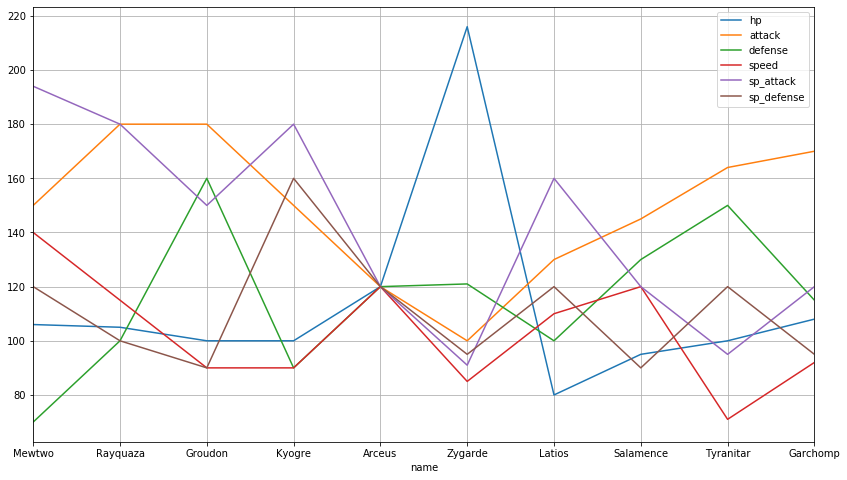

In [57]:
df.head(10).drop(columns=['total_point']).plot()
plt.grid()

### <div style='text-align: center'>А теперь то же самое, но в виде столбчатого графика, и тут мы видем что создатели покемона по имени Arceus забыли раскидать "статы" и он получился супер усреднённым</div>

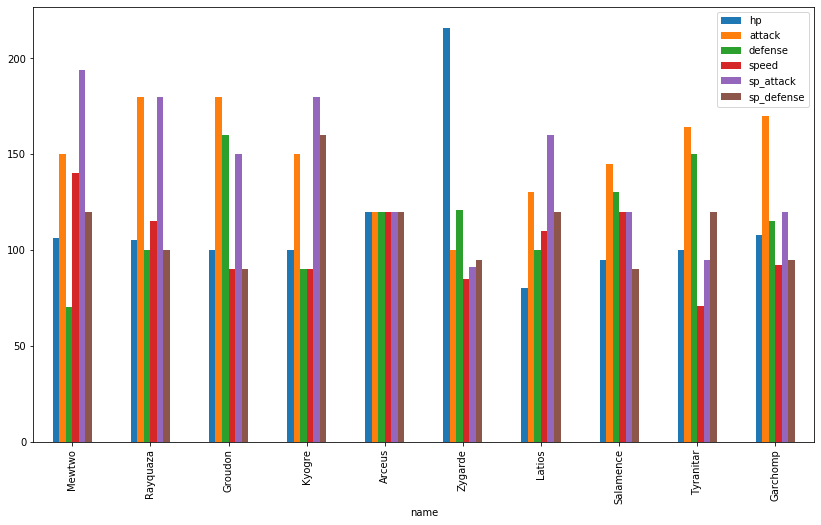

In [58]:
df.head(10).drop(columns=['total_point']).plot(kind='bar')

## <div style='text-align: center'>Для чего этот вид графика я так и не понял...</div>

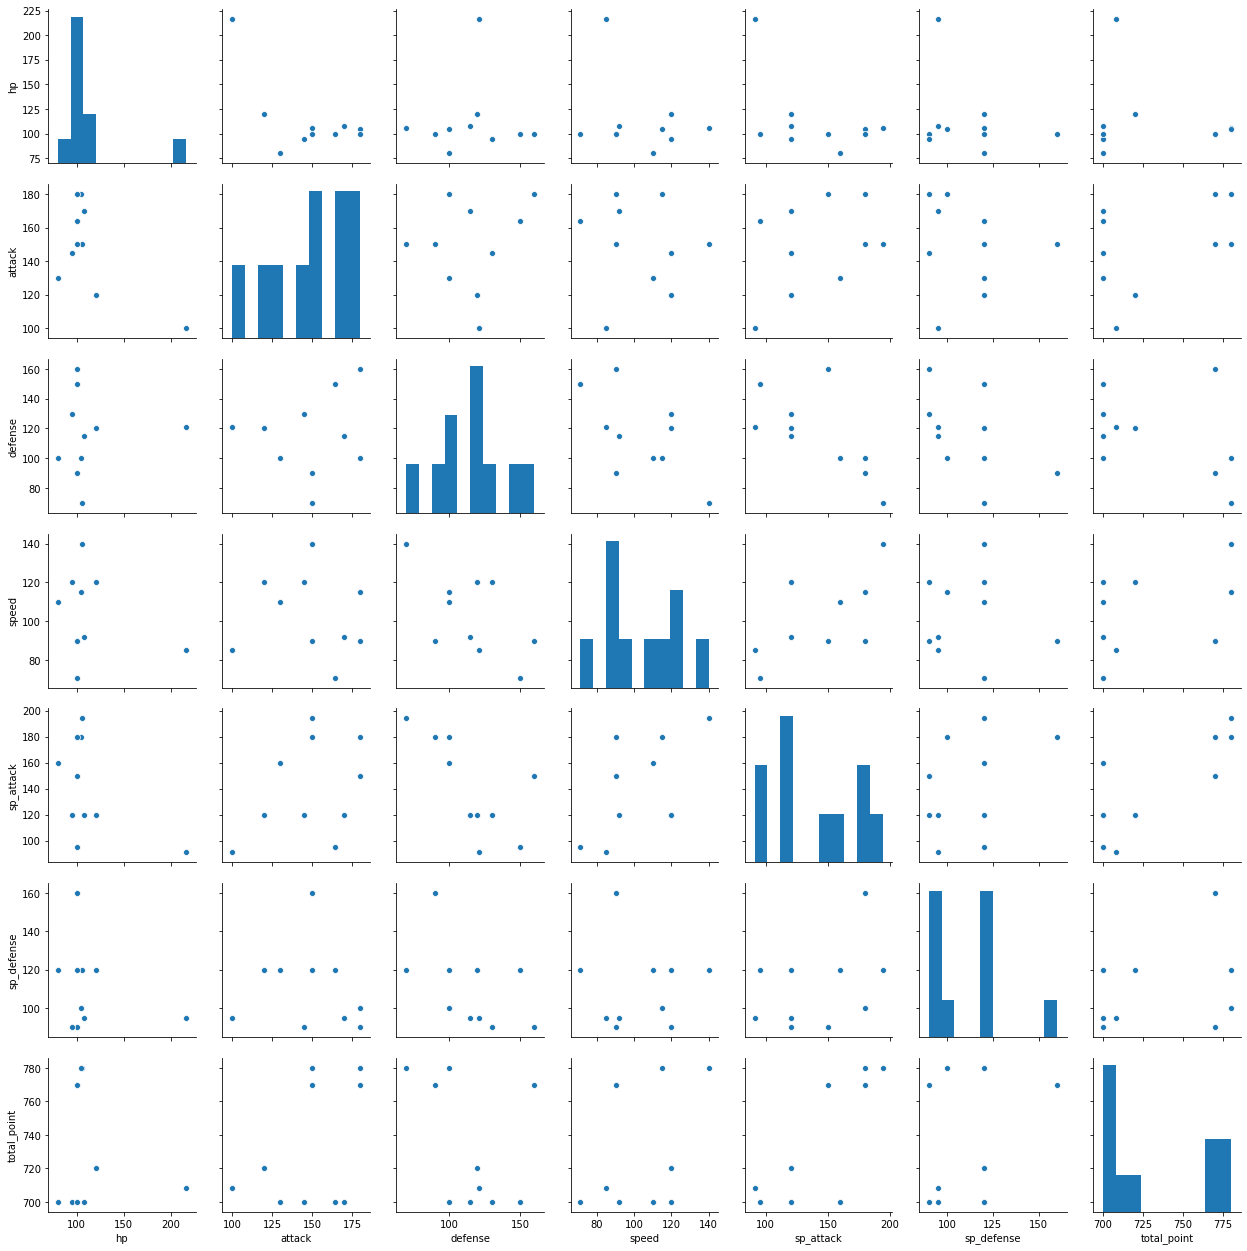

In [49]:
sns_plot = sns.pairplot(df.head(10))

### <div style='text-align: center'>Построим график на которм увидем что средний показатель "attack" примерно равен 136</div>

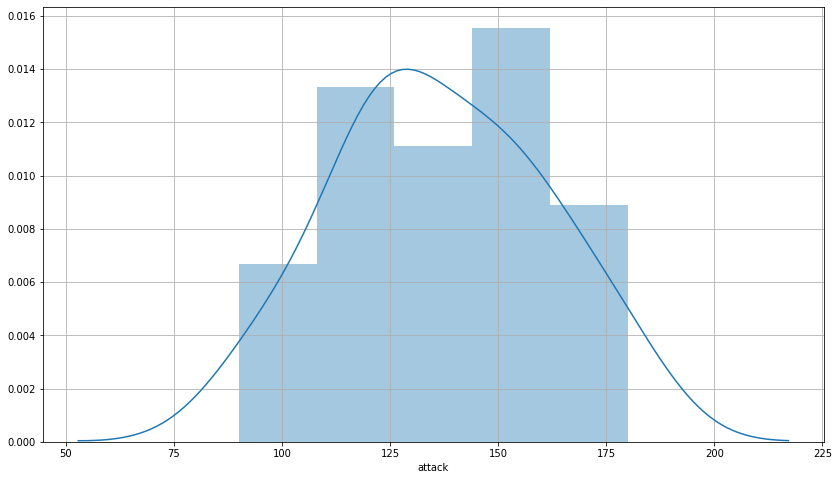

In [63]:
sns.distplot(df['attack'])
plt.grid()

### <div style='text-align: center'>Построим круговую диаграмму и увидем что ничего полезного она не показывает :)</div>

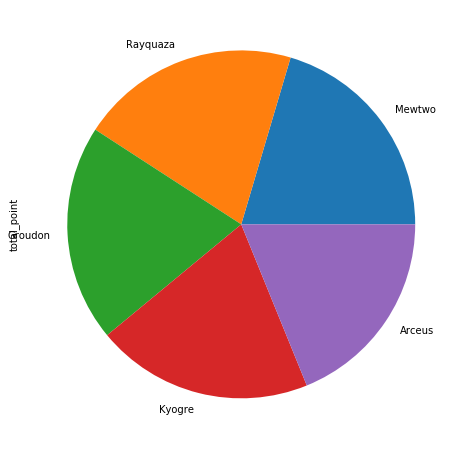

In [76]:
pie_df = df.groupby(['total_point']).head(5)
pie_df = test_df.head(5)
pie_df.total_point.plot(kind='pie')

## <div style='text-align: center'>Построим boxplot чтобы посмотреть разброс значений по всем статам</div>

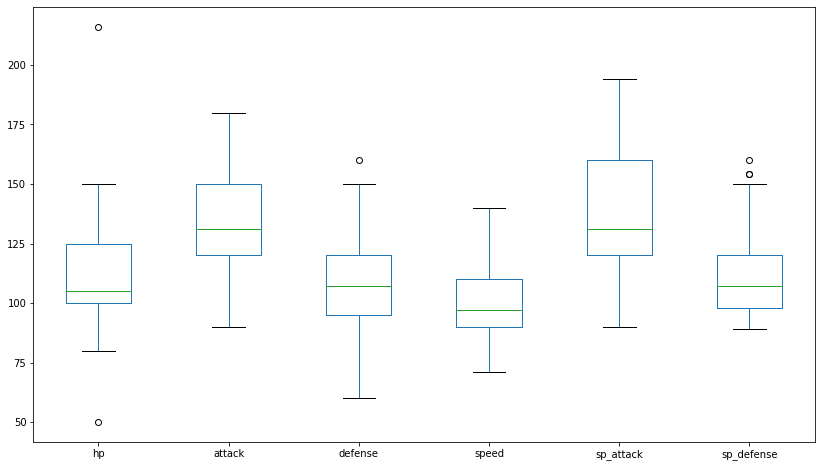

In [77]:
df.drop(columns=['total_point']).plot(kind='box')

# <div style='text-align:center'>И еще пару графиков, которые я пока не понял...</div>

## <div style='text-align: center'>Раз!</div>

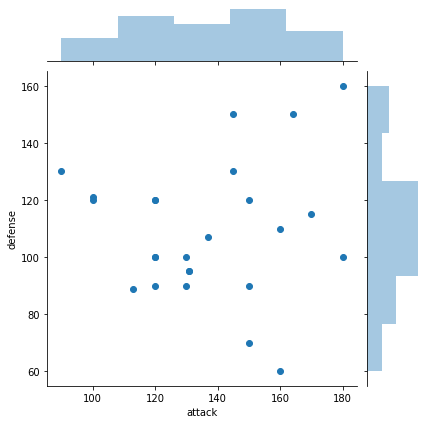

In [78]:
sns.jointplot(x='attack', y='defense', data=df, kind='scatter')

## <div style='text-align: center'>Два!</div>

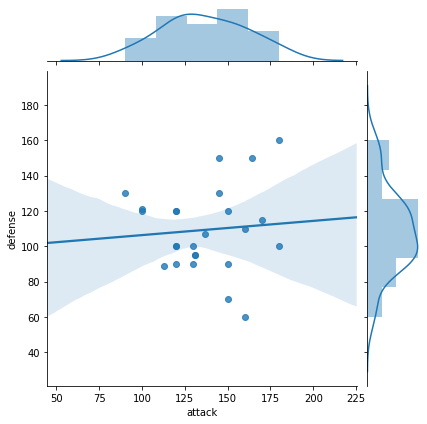

In [79]:
sns.jointplot(x='attack', y='defense', data=df, kind='reg')

## Резюме:<br>- Первое место делят Mewtwo и Rayquaza<br>- Покемон Arceus был забыт своими создателями (но это не точно)